# Priority Algorithm

This jupyter notebook focuses on extracting valuable insights from a corpus of sentences through feature extraction and product improvement priority analysis. Sentiment analysis, frequency analysis, category analysis, and feature prioritization allow for the quantification of sentiment associated with specific features, identification of frequently mentioned topics, categorization of feedback into relevant categories, and comprehensive ranking of features based on. This approach provides a deeper understanding of customer feedback, facilitates data-driven decision-making for product development and improvement, and helps uncover actionable insights that can guide future product enhancements and strategies.

## Detailed Process

### 1. Sentiment Analysis
Sentiment analysis focuses on extracting sentiment scores for specific target words from a corpus of sentences. It begins by selecting the target words of interest and creating individual corpora to group sentences containing each target word. Sentiment scores are calculated using the TextBlob library for each sentence in the individual corpora. The sentiment scores are then averaged for each target word. This process enables the quantification of sentiment for the target words, facilitating further analysis and comparison. Overall, the code provides a valuable mechanism for understanding the sentiment associated with specific words within the given corpus.

In [1]:
import pandas as pd
import numpy as np
import nltk

In [2]:
%store -r disney disney_sentences disney_title_df

In [3]:
title_df = disney_title_df

In [4]:
# Example word
target_words = title_df["Word"]

# Create an empty dictionary to store the individual corpora
individual_corpora = {word: [] for word in target_words}

# Iterate through each sentence in the original corpus
for sent in disney_sentences:
    # Iterate through each target word
    for word in target_words: 
        # Check if the target word is present in the sentence
        if word in sent.lower():
            # Append the sentence to the corresponding individual corpus
            individual_corpora[word].append(sent)

In [5]:
from textblob import TextBlob

# Create an empty dictionary to store the sentiment scores for each word
sentiment_scores = {word: [] for word in target_words}

# Iterate through each word and its corresponding individual corpus
for word, corpus in individual_corpora.items():
    # Iterate through each sentence in the individual corpus
    for sentence in corpus:
        # Calculate the sentiment score for the sentence
        blob = TextBlob(sentence)
        sentiment_score = blob.sentiment.polarity

        # Append the sentiment score to the corresponding word in the dictionary
        sentiment_scores[word].append(sentiment_score)

# Calculate the average sentiment score for each word
average_scores = {word: np.mean(scores) for word, scores in sentiment_scores.items()}

In [6]:
# Create a new column in the dataframe to store the sentiment scores
title_df["Sentiment"] = 0.0

# Iterate through each word in the dataframe
for i, word in title_df["Word"].iteritems():
    # Check if the word exists in the average_scores dictionary
    if word in average_scores:
        sentiment_score = average_scores[word]
        # Assign the sentiment score to the corresponding row in the dataframe
        title_df.loc[i, "Sentiment"] = sentiment_score

### 2. Frequency Analysis
Frequency analysis determines the number of mentions for specific words in individual corpora. It iterates through each word and its corresponding corpus, counting the number of mentions by summing the lengths of the sentences. This frequency analysis allows for a quantitative assessment of word occurrences within the corpus, providing insights into the prominence and usage of the target words.

In [7]:
mentions = {}

# Iterate through each word and its corresponding individual corpus
for word, corpus in individual_corpora.items():
    # Count the mentions for the word
    mention_count = sum(len(sent) for sent in corpus)
    
    # Store the mention count in the dictionary
    mentions[word] = mention_count

In [8]:
title_df["Mentions"] = [mentions[word] for word in title_df["Word"]]

### 3. Category Analysis
The provided code snippet focuses on analyzing categories associated with specific words. Here's a breakdown of the code and its aim:

1. **Category Mapping**: The code defines a category mapping dictionary, category_mapping, which assigns categories to specific words of interest. It then applies the mapping to the title_df DataFrame, creating a new column, "Category," where each word is assigned its respective category.
2. **Ranking Categories**: The code calculates the frequency or count of topics within each category and then ranks the categories based on the number of keyword in each category. Higher ranks indicate categories with more extracted keywords, meaning that more words are identified as important features in the category.
3. **Assigning Weights to Categories**: The code assigns weights to the categories based on their ranks. Higher-ranked categories receive higher weights. This is implemented by taking the reciprocal of the category ranks, assigning higher weights to higher-ranked categories and lower weights to lower-ranked categories. The weights are then normalized to ensure that they sum up to 1, maintaining relative proportions. This normalization allows for a fair comparison and aggregation of the weights across categories.

In [10]:
# Define the category mapping
category_mapping = {
    'queue': 'Queue/Waiting',
    'fast': 'Queue/Waiting',
    "minute":'Queue/Waiting',
    "time":'Queue/Waiting',
    'wait': 'Queue/Waiting',
    "min":'Queue/Waiting',
    
    'food': 'Food',
    "lunch":'Food',
    "snack":'Food',
    "buffet":'Food',
    "burger":'Food',
    "drink":'Food',
    "restaurant":'Food',
    'eat': 'Food',
    "bar":'Food',
    
    'character': 'Entertainment',
    'show': 'Entertainment',
    "shop":"Entertainment",
    "parade":"Entertainment",
    "mickey":"Entertainment",
    "theme":"Entertainment",
    
    'break': 'Park Attractions',
    'mountain': 'Park Attractions',
    'pirate': 'Park Attractions',
    "coaster": 'Park Attractions',
    "attraction": 'Park Attractions',
    "castle":'Park Attractions',
    
    'money': 'Price',
    'pay': 'Price',
    'ticket': 'Price',
    "price": "Price",
    
    'train': 'Transportation',
    "bus":'Transportation',
    "car": 'Transportation',
    
    'staff': 'Staff/Service',
    'service': 'Staff/Service',
    "review":"Staff/Service",
    "problem": "Staff/Service",
    "help":"Staff/Service",
    "member":"Staff/Service",
    "clean":"Staff/Service",
    
    'room': 'Accommodation',
    'hotel': 'Accommodation',
    "stayed":"Accommodation",
    
    "crowd":"Crowdness",
    "people":"Crowdness",
    "push":"Crowdness"
}

# Apply the category mapping to create the 'Category' column
title_df['Category'] = title_df['Word'].map(category_mapping)

In [11]:
# Calculate the frequency or count of topics within each category
category_counts = title_df['Category'].value_counts()

# Rank the categories based on frequency
category_ranks = category_counts.rank(ascending=False)

# Assign weights based on the ranks
category_weights = 1 / category_ranks

# Normalize the weights to ensure they sum up to 1
total_weight = category_weights.sum()
category_weights /= total_weight

# Map the custom weights to the respective categories
title_df['Category Weight'] = title_df['Category'].map(category_weights)

### 4. Feature Prioritization
This part calculates a weighted score by considering multiple features. It defines weights for the sentiment, category, and mentions columns, determining the importance of each feature. The weighted score is computed by combining the values of these columns based on their respective weights. Ranks are assigned to the rows based on the weighted score, indicating their relative position in the ranking. Overall, this code enables the calculation of a comprehensive weighted score that incorporates various features and facilitates the product feature prioritization and analysis of data based on user-generated review data.

In [62]:
# Define weights for each column
sentiment_weight = 0.5
category_weight = 0.4
mentions_weight = 0.3

# Calculate the weighted score for each feature
title_df['Weighted Score'] = round((title_df['Sentiment'] * sentiment_weight) + \
                             (title_df['Category Weight'] * category_weight) + \
                             (title_df['Mentions'] * mentions_weight),3)

In [63]:
# Sorting the DataFrame 'title_df' based on 'Weighted Score' in descending order
title_df.sort_values(by='Weighted Score', ascending=False, inplace=True)

# Adding a new column 'Rank' to 'title_df'. This ranks the 'Weighted Score' in descending order
title_df["Rank"] = title_df['Weighted Score'].rank(ascending=False)

# Dropping the unneccasary column from the DataFrame 'title_df'
# title_df.drop(["Probability","Topic"], axis=1, inplace=True)

In [64]:
# Group by "Category" and calculate the average weighted score for each category
grouped_df =  title_df.groupby("Category")["Weighted Score"].mean().reset_index()

# Sort the DataFrame based on the average weighted score in descending order
grouped_df = grouped_df.sort_values(by="Weighted Score", ascending=False)

# Reset the index of the DataFrame
grouped_df.reset_index(drop=True, inplace=True)

# Add a "Rank" column to represent the rank of each category
grouped_df["Rank"] = grouped_df.index + 1

grouped_df["Weighted Score"] = round(grouped_df["Weighted Score"],3)

In [65]:
# Scaling down the scores by a factor of 1000
grouped_df['Scaled Score'] = grouped_df['Weighted Score'] / 1000

# Calculating the total score
total_score = grouped_df['Weighted Score'].sum()

# Converting each score into a percentage of the total score
grouped_df['Percentage'] = (grouped_df['Weighted Score'] / total_score) * 100

In [66]:
# Check the upper level categories of product features
grouped_df

,Category,Weighted Score,Rank,Scaled Score,Percentage
0,Queue/Waiting,2272806.896,1,2272.806896,20.153416
1,Price,1379624.492,2,1379.624492,12.233396
2,Transportation,1328012.300,3,1328.012300,11.775740
3,Entertainment,1297433.046,4,1297.433046,11.504588
4,Crowdness,1209691.387,5,1209.691387,10.726566
5,Food,1037223.959,6,1037.223959,9.197264
6,Accommodation,988055.195,7,988.055195,8.761275
7,Staff/Service,922564.839,8,922.564839,8.180560
8,Park Attractions,842114.960,9,842.114960,7.467195


In [71]:
# Check the ranking of the individual features
title_df

,Word,Sentiment,Mentions,Category,Category Weight,Weighted Score,Rank
93,time,0.200838,12387989,Queue/Waiting,0.143501,3716396.829,1.0
105,eat,0.237384,10641486,Food,0.358753,3192445.990,2.0
50,wait,0.170117,7759087,Queue/Waiting,0.143501,2327726.214,3.0
114,food,0.178753,7291530,Food,0.358753,2187459.161,4.0
62,fast,0.186394,7071696,Queue/Waiting,0.143501,2121508.922,5.0
160,show,0.208485,6500696,Entertainment,0.143501,1950208.933,6.0
26,car,0.176636,6262766,Transportation,0.055193,1878829.899,7.0
72,parade,0.179867,6058603,Entertainment,0.143501,1817581.019,8.0
80,people,0.159635,6030071,Crowdness,0.055193,1809021.391,9.0
64,queue,0.156045,5692913,Queue/Waiting,0.143501,1707874.007,10.0


### 5. Data Visualisation of the Result

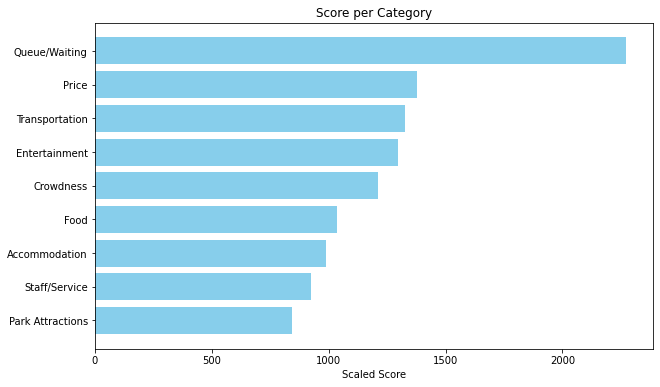

In [68]:
import matplotlib.pyplot as plt

# Create a horizontal bar chart for the scaled score
plt.figure(figsize=(10,6))
plt.barh(grouped_df['Category'], grouped_df['Scaled Score'], color='skyblue')
plt.xlabel('Scaled Score')
plt.title('Score per Category')
plt.gca().invert_yaxis()  # To display the highest score at the top
plt.show()

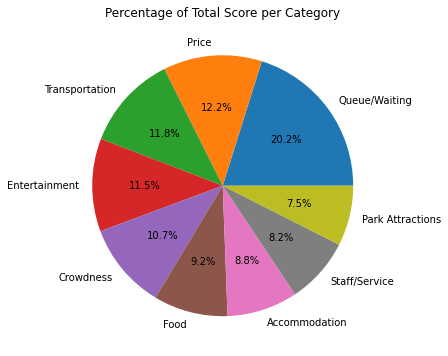

In [69]:
# Create a pie chart for the percentage
plt.figure(figsize=(10,6))
plt.pie(grouped_df['Percentage'], labels=grouped_df['Category'], autopct='%1.1f%%')
plt.title('Percentage of Total Score per Category')
plt.show()